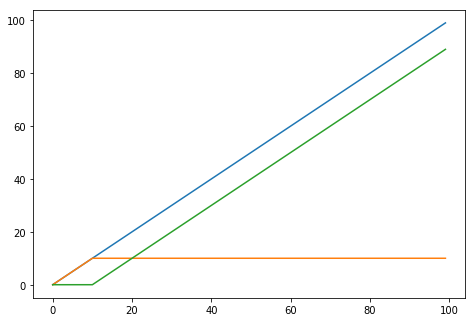

In [11]:
# Jupyter notebook

from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline

plot_blocks = 100
coconuts_per_block = 1
coconut_maturation_blocks = 10

state = {
    'init_block_index': 0,
    'coconut_tree_count': 1,
    'snapshot_young_coconuts': 0,
}

def saturating_sub(a, b):
    c = a - b
    if c < 0:
        c = 0
    return c

def baseline_coconuts(state, block_index):
    diff_block_index = block_index - state['init_block_index']
    coconuts_since_init = diff_block_index * state['coconut_tree_count'] * coconuts_per_block
    baseline = state['snapshot_young_coconuts'] + coconuts_since_init
    return baseline

def young_coconut_balance(state, block_index):
    baseline = baseline_coconuts(state, block_index)
    brown_coconuts = brown_coconut_balance(state, block_index)
    coconuts = baseline - brown_coconuts
    return coconuts

def brown_coconut_balance(state, block_index):
    baseline = baseline_coconuts(state, block_index)
    coconuts = saturating_sub(baseline, coconut_maturation_blocks)
    coconuts = coconuts * coconuts_per_block
    return coconuts

x = np.arange(state['init_block_index'], state['init_block_index'] + plot_blocks)
baseline_coconuts_bound = lambda x: baseline_coconuts(state, x)
young_coconut_balance_bound = lambda x: young_coconut_balance(state, x)
brown_coconut_balance_bound = lambda x: brown_coconut_balance(state, x)

y_baseline_coconuts = np.array(list(map(baseline_coconuts_bound, x)))
y_young_coconut_balance = np.array(list(map(young_coconut_balance_bound, x)))
y_brown_coconut_balance = np.array(list(map(brown_coconut_balance_bound, x)))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y_baseline_coconuts)
ax.plot(x, y_young_coconut_balance)
ax.plot(x, y_brown_coconut_balance)